# Check consistency

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from few.trajectory.inspiral import EMRIInspiral
from few.summation.aakwave import AAKSummation
from few.waveform import Pn5AAKWaveform, AAKWaveformBase
from few.utils.utility import (get_overlap, 
                               get_mismatch, 
                               get_fundamental_frequencies, 
                               get_separatrix, 
                               get_mu_at_t, 
                               get_p_at_t, 
                               get_kerr_geo_constants_of_motion,
                               xI_to_Y,
                               Y_to_xI)

from few.summation.interpolatedmodesum import CubicSplineInterpolant

# set initial parameters
M = 1e6
mu = 1e1
a = 0.9
p0 = 8.0
e0 = 0.0
iota0 = 0.0
Y0 = np.cos(iota0)
Phi_phi0 = 0.0
Phi_theta0 = 0.0
Phi_r0 = 0.0

dt = 10.0
T = 1.0


args1=np.array([
    0.05,
])

traj = EMRIInspiral(func="KerrCircFlux")


# run trajectory
import time
start = time.time()
t, p, e, Y, Phi_phi, Phi_r, Phi_theta = traj(M, mu, a, p0, e0, Y0,  Phi_phi0, Phi_theta0, Phi_r0, *args1,  T=T, dt=dt)
print('time', time.time()-start)


args=np.array([
    0.0,
])

start = time.time()
t2, p2, e2, Y2, Phi_phi2, Phi_r2, Phi_theta2 = traj(M, mu, a, p0, e0, Y0, Phi_phi0, Phi_theta0, Phi_r0, *args, T=T, dt=dt, upsample=True, new_t=t)
print('time', time.time()-start)

tfinal = np.min([t[-1], t2[-1]])

spl2 = CubicSplineInterpolant(t2, Phi_phi2)
spl1 = CubicSplineInterpolant(t, Phi_phi)

t_new = np.linspace(0,tfinal)

time 0.0021448135375976562
time 0.004120826721191406


## info

++ initial_radius.dat: 
contains the value of the inital radius (second column) for different values 
of the scalar charge (first column) corresponding to one year of evolution up to r_end=2.42 
which is ~ r_isco(pin=0.9) + 0.1

++ phase_1yr_dXXX.dat
one year of phase evolution as a function of time (in days) for different values of the scalar charge, 
starting from the initial radius provided in initial_radius.dat


In [2]:
!ls ../../

README.md              phase_1yr_d0.001.dat   phase_1yr_d0.15.dat
__pycache__            phase_1yr_d0.005.dat   phase_1yr_d0.2.dat
fluxes                 phase_1yr_d0.01.dat    pyAAKwave
initial_radius.dat     phase_1yr_d0.05.dat    pySchw
phase_1yr_GR.dat       phase_1yr_d0.1.dat     readme_phase_evolution


In [3]:
!cat ../../initial_radius.dat

0	7.1628543734226717653408197670624272209285932367817
1/1000	7.1628545096825828936524785501717569703120735722645
1/200	7.1628577799195891480980185306473510634890623170765
1/100	7.1628679993995809935119783440357886689749870279024
1/20	7.1631950142373616533386657411708695606577735737544
1/10	7.1642168290909974351486204533854254412934372974436
3/20	7.1659194952886607912129169368342834554567781511064
1/5	7.1683024752603893082471866012122847746045440553164

In [4]:
!cat ../../phase_1yr_d0.2.dat 

0	0.e-56
3600	36.36842800544300844397878371092326698669191886153
7200	72.73837173388507503437672587197111818402921961756
10800	109.10983141452671562623032800322992844626778481955
14400	145.4828072765855599416838683474013499441124861706
18000	181.857299549388158706978607200191341260739955744
21600	218.2333084623751272800601131340914727241140237893
25200	254.61083424498814615588154583046625241277538056979
28800	290.98987712666889582939606497068018840526471634884
32400	327.3704373368227716558587819050547641301986542739
36000	363.7525151050718098568279249248642736104564626288
39600	400.1361106612498964290829712802076648100733723922
43200	436.5212242351922155534461529149767225539844019835
46800	472.9078560567339514107397017730632316671245698224
50400	509.2960063557102881817858497983589769744288943284
54000	545.6856753619564100474068289347557433008323939211
57600	582.07686330530750118842487112614531547127008702
61200	618.4695704153148680714649661781240114123092856323
64800	654.86379692151860

In [5]:
def convert(s):
    try:
        return float(s)
    except ValueError:
        num, denom = s.split('/')
        return float(num) / float(denom)

filename = "../../initial_radius.dat"

res = []
with open(filename, 'r') as f:
    for line in f:
        for num in line.split('\t'):
            print(convert(num))
            res.append(convert(num))

charge_radius = np.asarray(res).reshape(int(len(res)/2),2)

0.0
7.162854373422672
0.001
7.162854509682583
0.005
7.162857779919589
0.01
7.162867999399581
0.05
7.1631950142373615
0.1
7.164216829090997
0.15
7.1659194952886605
0.2
7.168302475260389


In [6]:
charge_radius

array([[0.00000000e+00, 7.16285437e+00],
       [1.00000000e-03, 7.16285451e+00],
       [5.00000000e-03, 7.16285778e+00],
       [1.00000000e-02, 7.16286800e+00],
       [5.00000000e-02, 7.16319501e+00],
       [1.00000000e-01, 7.16421683e+00],
       [1.50000000e-01, 7.16591950e+00],
       [2.00000000e-01, 7.16830248e+00]])

## Check

In [36]:
!ls ../../faseconcarica

phase_1yr_GR.dat     phase_1yr_d0.005.dat phase_1yr_d0.2.dat


In [89]:
charge_check = 0.0

timeDays_phase =np.loadtxt(f'../../faseconcarica/phase_1yr_GR.dat')#np.loadtxt(f'../../faseconcarica/phase_1yr_d{charge_check}.dat') #np.loadtxt(f'../../phase_1yr_d{charge_check}.dat')#  np.loadtxt(f'../../phase_1yr_GR.dat')#
ind_initial_cond = np.where(charge_radius==charge_check)[0][0]

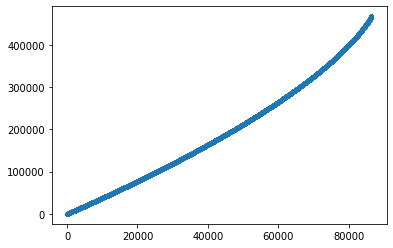

In [90]:
plt.plot(timeDays_phase[:,0], timeDays_phase[:,1],'.')

t2 = timeDays_phase[:,0]*365# faseconcarica need 365 factor
Phi_phi2 = timeDays_phase[:,1]
#*24*3600

In [91]:

# set initial parameters
M = 1e6
mu = 1e1
a = 0.9
p0 = charge_radius[ind_initial_cond,1]
e0 = 0.0
iota0 = 0.0
Y0 = np.cos(iota0)
Phi_phi0 = 0.0
Phi_theta0 = 0.0
Phi_r0 = 0.0

dt = 10.0
T = 1#t2[-1]/#(3600*24*365)


args1=np.array([
    charge_radius[ind_initial_cond,0],
])

traj = EMRIInspiral(func="KerrCircFlux")

print(args1[0], p0)

# run trajectory
import time
start = time.time()
t, p, e, Y, Phi_phi, Phi_r, Phi_theta = traj(M, mu, a, p0, e0, Y0,  Phi_phi0, Phi_theta0, Phi_r0, *args1,  T=T, dt=dt,)
print('time', time.time()-start)



tfinal = np.min([t[-1], t2[-1]])

spl2 = CubicSplineInterpolant(t2, Phi_phi2)
spl1 = CubicSplineInterpolant(t, Phi_phi)

t_new = np.linspace(0.01,tfinal)

0.0 7.162854373422672
time 0.008346080780029297


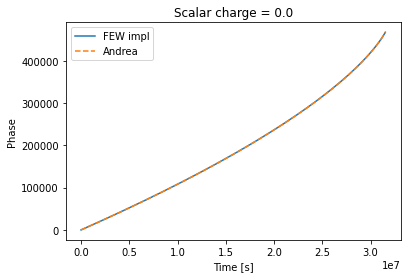

In [92]:
#%matplotlib inline
plt.figure()
plt.title(f'Scalar charge = {charge_check}')
plt.plot(t, Phi_phi, label='FEW impl')
plt.plot(t2, Phi_phi2, '--', label='Andrea')
# plt.xlim([0.0, t2[-1]])
# plt.ylim([0.0, Phi_phi2[-1]])
plt.legend()
plt.xlabel('Time [s]')
plt.ylabel('Phase')
plt.show()

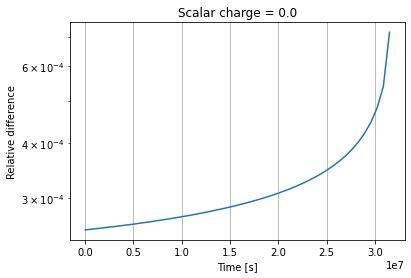

In [93]:
plt.figure()
plt.title(f'Scalar charge = {charge_check}')
plt.semilogy(t_new, np.abs(spl2(t_new) -spl1(t_new))/spl1(t_new))
plt.xlabel('Time [s]')
plt.ylabel('Relative difference')
plt.grid()
plt.savefig(f'error_trajectories_{charge_check}.pdf')